In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
file_path = 'bank-full.csv'
data = pd.read_csv(file_path, sep= ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
print(f"the data shape is",data.shape)
print("Description")
data.describe()

the data shape is (45211, 17)
Description


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
#hande outliers 
lower_bound = data['balance'].quantile(0.01)
upper_bound = data['balance'].quantile(0.99)
data['balance'] = data['balance'].clip(lower = lower_bound, upper = upper_bound)

In [5]:
#missing valu check befor cleaning 
mvb = data.isnull().sum()
print(mvb)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
categoricol_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categoricol_columns:
    data[col] = data[col].astype('category')

In [7]:
# Here, we assume 'balance' and 'duration' should not be negative
data['balance'] = data['balance'].apply(lambda x: max(x, 0))
data['duration'] = data['duration'].apply(lambda x: max(x, 0))

In [8]:
#replace -1 in pdays with NA
data.loc[data['pdays'] == -1, 'pdays'] = pd.NA

In [9]:
# Handle missing values with SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['pdays'] = imputer.fit_transform(data[['pdays']])

In [10]:
mva = data.isnull().sum()
print(mva)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [11]:
# Summarize the changes
data_cleaning_summary = {
    "Missing Values Before Cleaning": mvb,
    "Missing Values After Cleaning": mva
}

print(data_cleaning_summary)

{'Missing Values Before Cleaning': age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64, 'Missing Values After Cleaning': age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64}


In [12]:
sns.set_style("whitegrid")

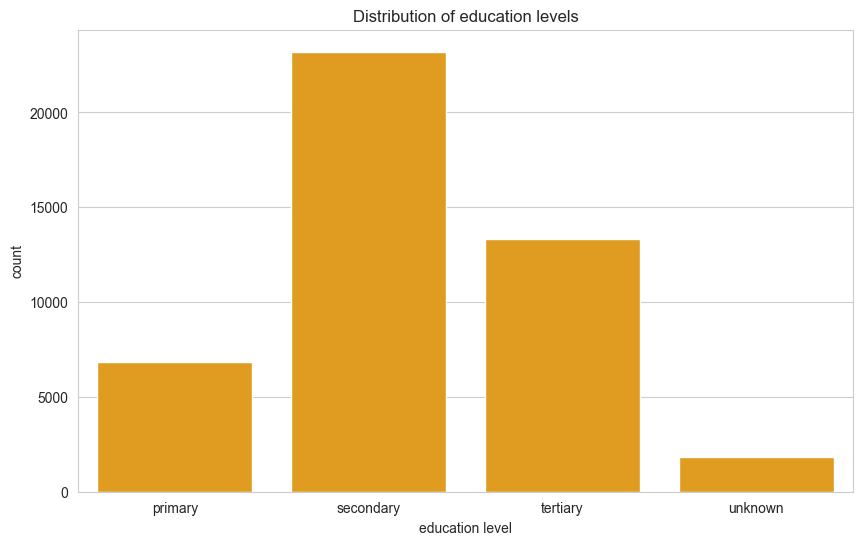

In [13]:
#education level distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=data, color='orange')
plt.title('Distribution of education levels')
plt.xlabel('education level')
plt.ylabel('count')
plt.show()


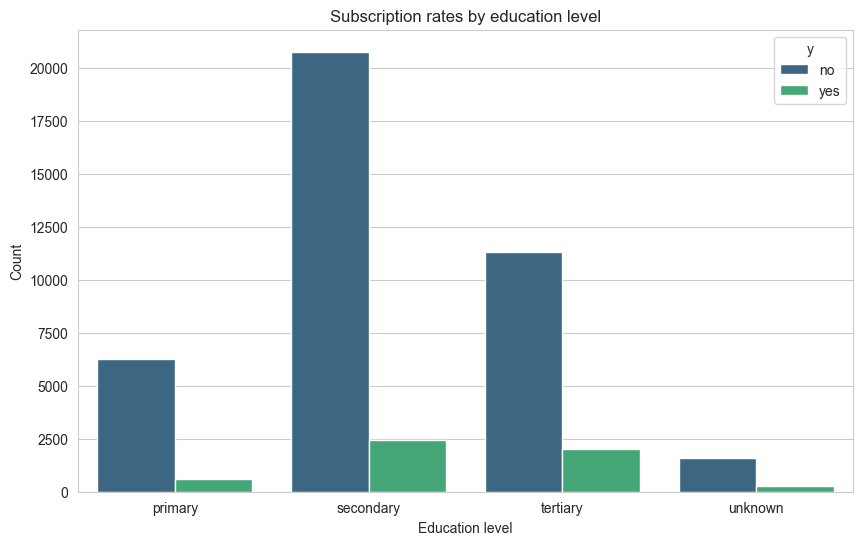

In [14]:
#subscription rate by education level 
plt.figure(figsize=(10, 6))
sns.countplot(x='education' ,hue='y', data=data, palette='viridis')
plt.title("Subscription rates by education level")
plt.xlabel("Education level")
plt.ylabel("Count")
plt.show()


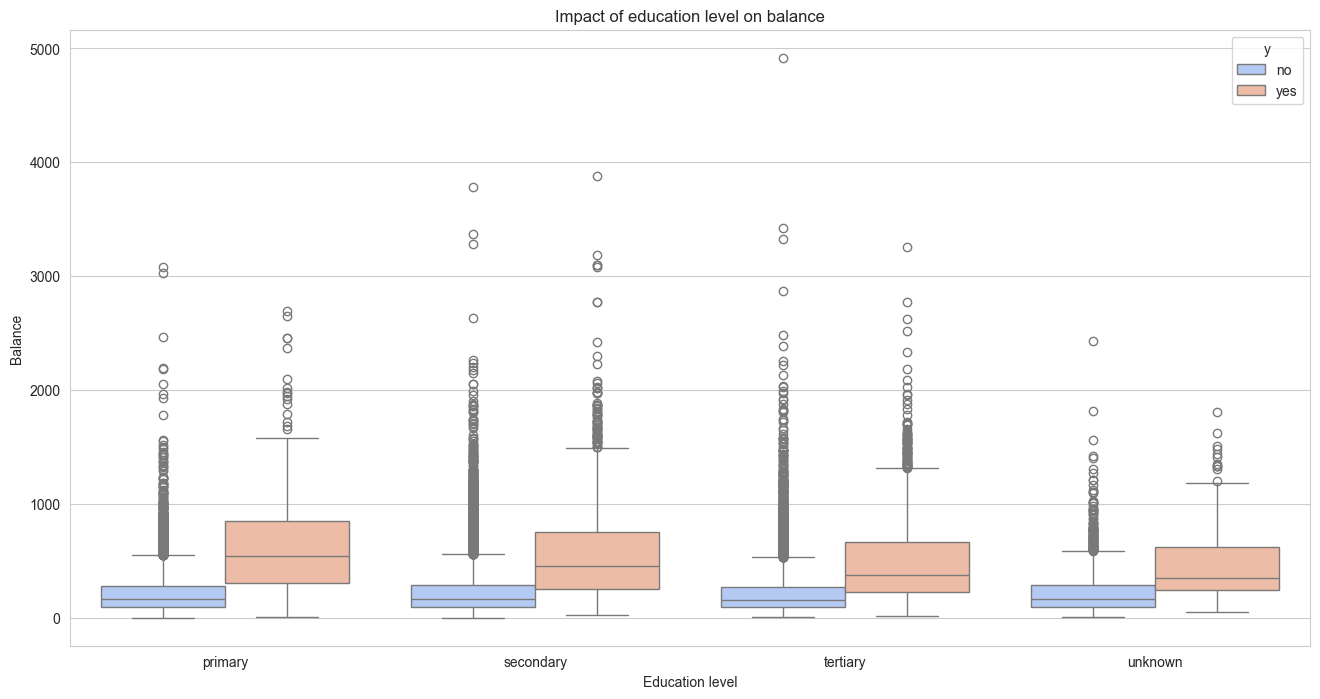

In [15]:
#impact of education level on balance
plt.figure(figsize=(16, 8))
sns.boxplot(x='education', y='duration', hue='y', data=data, palette='coolwarm')
plt.title("Impact of education level on balance")
plt.xlabel("Education level")
plt.ylabel("Balance")
plt.show()

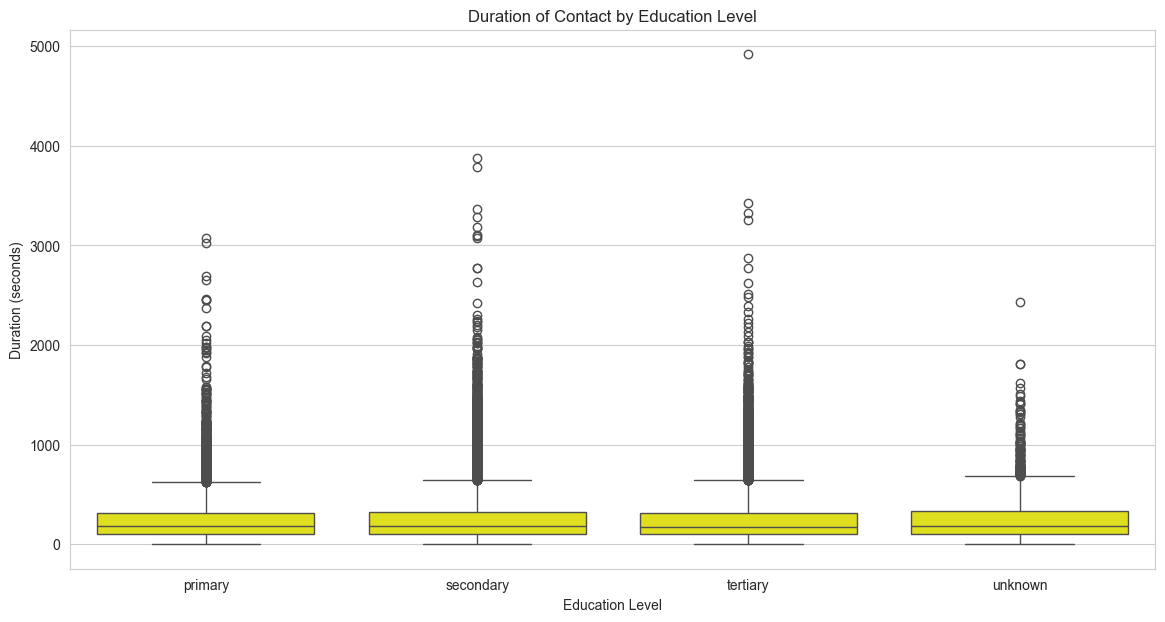

In [16]:
#impact of education level on duration of contact
plt.figure(figsize=(14, 7))
sns.boxplot(x='education', y='duration', data=data, color='yellow')
plt.title('Duration of Contact by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Duration (seconds)')
plt.show()

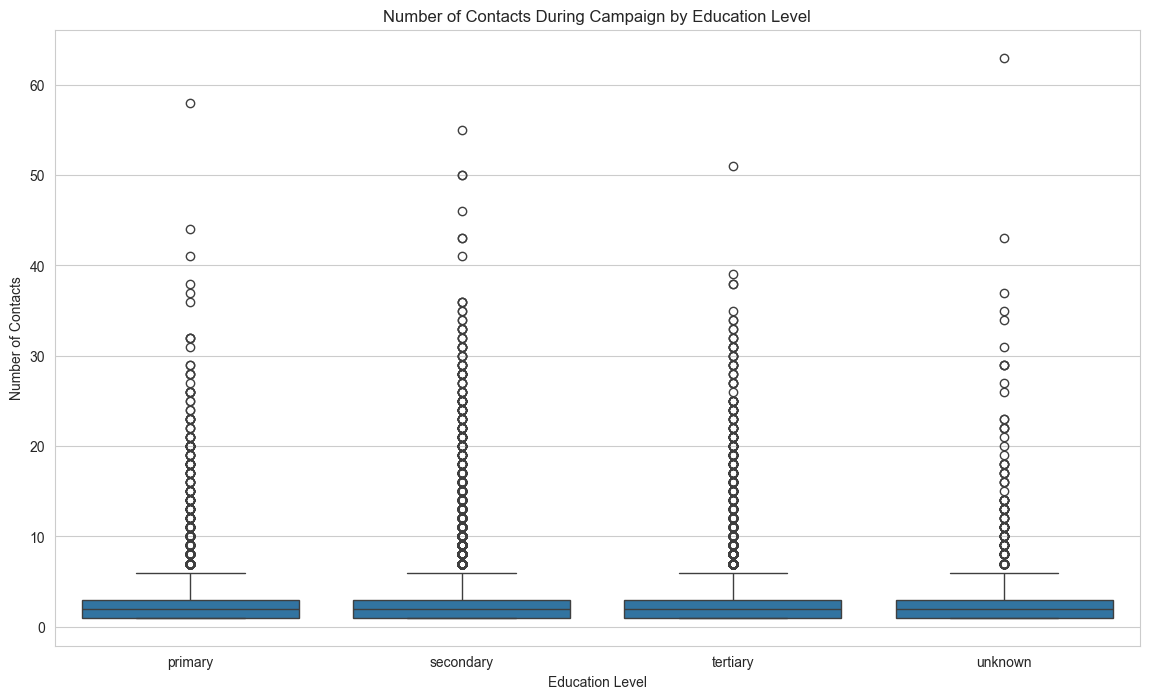

In [17]:
#impact of Education Level on Campaign Effectiveness
plt.figure(figsize=(14, 8))
sns.boxplot(x='education', y='campaign', data=data)
plt.title('Number of Contacts During Campaign by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Contacts')
plt.show()

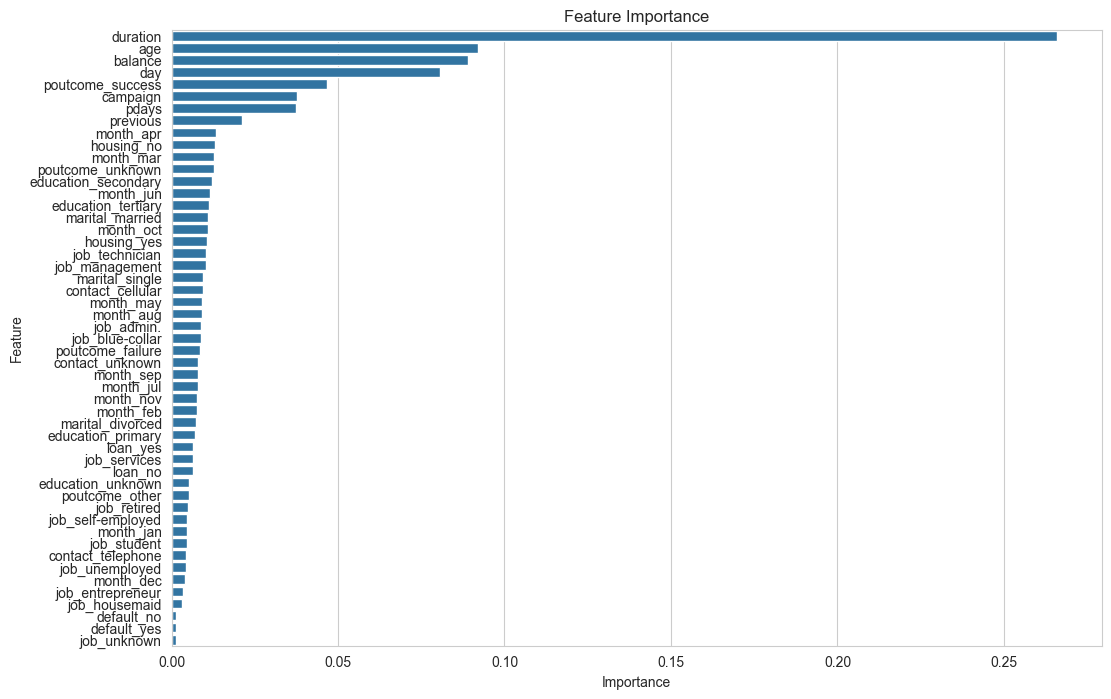

Top 10 Features:
             Feature  Importance
3           duration    0.266006
0                age    0.092004
1            balance    0.089153
2                day    0.080543
49  poutcome_success    0.046782
4           campaign    0.037788
5              pdays    0.037318
6           previous    0.021220
35         month_apr    0.013349
28        housing_no    0.013076


In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

#encode categoricoal data
data = pd.get_dummies(data, columns=categoricol_columns[:-1])

#split data into features (X) and target variable (y)
X = data.drop(columns=['y'])
y = data['y']

#split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standirisation of numerical features 
scaler = StandardScaler()
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

#feature importance using randomforest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

#sort feature importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#plot them
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#display the top 10
print("Top 10 Features:")
print(feature_importances.head(10))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

#identification of categorical and numerical columns
categorical_columns = X.select_dtypes(include=['category']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [20]:
#define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns)
    ])

#defining the model pipline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [21]:
#split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

#evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')
print(report)

Accuracy: 0.8845515868627668
ROC AUC: 0.8293189475994371
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.57      0.18      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.88      0.86      9043



In [22]:
#preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns)
    ])

#balanced
model_balanced = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

In [23]:
model_balanced.fit(X_train, y_train)

y_pred_balanced = model_balanced.predict(X_test)
y_pred_prob_balanced = model_balanced.predict_proba(X_test)[:, 1]

accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test, y_pred_prob_balanced)
report_balanced = classification_report(y_test, y_pred_balanced)

print(f'Accuracy with balanced weights: {accuracy_balanced}')
print(f'ROC AUC with balanced weights: {roc_auc_balanced}')
print(report_balanced)

Accuracy with balanced weights: 0.7925467212208338
ROC AUC with balanced weights: 0.8323896172636184
              precision    recall  f1-score   support

          no       0.95      0.81      0.87      7952
         yes       0.33      0.69      0.45      1091

    accuracy                           0.79      9043
   macro avg       0.64      0.75      0.66      9043
weighted avg       0.87      0.79      0.82      9043



In [24]:
from sklearn.svm import SVC

model_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', SVC(probability=True, class_weight = 'balanced', random_state =42))
])

model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
y_pred_proba_svm = model_svm.predict_proba(X_test)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'Accuracy with SVM: {accuracy_svm}')
print(f'ROC AUC with SVM: {roc_auc_svm}')
print(report_svm)

Accuracy with SVM: 0.7801614508459582
ROC AUC with SVM: 0.8625885699162897
              precision    recall  f1-score   support

          no       0.97      0.78      0.86      7952
         yes       0.33      0.81      0.47      1091

    accuracy                           0.78      9043
   macro avg       0.65      0.80      0.67      9043
weighted avg       0.89      0.78      0.81      9043



In [25]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

file_path = 'bank-full.csv'
data = pd.read_csv(file_path, sep=';')

#define the target variable and features
X = data.drop('y', axis=1)
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

#identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

#define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns)
    ])

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#convert y_train to numerical values if not already
y_train_num = y_train.astype(int)

#correct the calculation of scale_pos_weight
scale_pos_weight = (len(y_train_num) - y_train_num.sum()) / y_train_num.sum()

#define the XGBoost model
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss'))
])

xgb_model.fit(X_train, y_train_num)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f'Accuracy with XGBoost: {accuracy_xgb}')
print(f'ROC AUC with XGBoost: {roc_auc_xgb}')
print(report_xgb)


Accuracy with XGBoost: 0.8743779719119761
ROC AUC with XGBoost: 0.9252982612720212
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      7985
           1       0.48      0.80      0.60      1058

    accuracy                           0.87      9043
   macro avg       0.72      0.84      0.76      9043
weighted avg       0.91      0.87      0.89      9043



In [ ]:
# Import necessary libraries
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('/mnt/data/Bank Customer Churn Prediction.csv')

# Load your trained model
model_path = '/mnt/data/Final_Model.ipynb'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data)

# Display SHAP summary plot
shap.summary_plot(shap_values, data)
plt.show()

# Save the SHAP explainer for later use in Streamlit app if needed
with open('shap_explainer.pkl', 'wb') as file:
    pickle.dump(explainer, file)





import streamlit as st
import pandas as pd
import pickle
import base64

# Load your trained model and preprocessing info
with open('final_model.pkl', 'rb') as file:
    model = pickle.load(file)
with open('preprocessing_info.pkl', 'rb') as file:
    preprocessing_info = pickle.load(file)

def preprocess_data(data, preprocessing_info):
    # One-hot encode categorical columns
    data_encoded = pd.get_dummies(data, columns=preprocessing_info['categorical_columns'], drop_first=True)
    
    # Ensure all expected columns are present
    missing_cols = set(preprocessing_info['columns']) - set(data_encoded.columns)
    for col in missing_cols:
        data_encoded[col] = 0
    data_encoded = data_encoded[preprocessing_info['columns']]
    
    return data_encoded

def get_user_input():
    st.sidebar.header("User Input Parameters")
    
    credit_score = st.sidebar.slider('Credit Score', min_value=300, max_value=850, value=600)
    age = st.sidebar.slider('Age', min_value=18, max_value=100, value=30)
    tenure = st.sidebar.slider('Tenure', min_value=0, max_value=10, value=5)
    balance = st.sidebar.number_input('Balance', min_value=0.0, max_value=250000.0, value=50000.0)
    num_of_products = st.sidebar.selectbox('Number of Products', [1, 2, 3, 4], index=1)
    has_cr_card = st.sidebar.radio('Has Credit Card', [0, 1])
    is_active_member = st.sidebar.radio('Is Active Member', [0, 1])
    estimated_salary = st.sidebar.number_input('Estimated Salary', min_value=0.0, max_value=200000.0, value=50000.0)

    data = {'Credit Score': credit_score,
            'Age': age,
            'Tenure': tenure,
            'Balance': balance,
            'Number of Products': num_of_products,
            'Has Credit Card': has_cr_card,
            'Is Active Member': is_active_member,
            'Estimated Salary': estimated_salary}
    features = pd.DataFrame(data, index=[0])
    return features

def main():
    st.title("Customer Churn Prediction Dashboard")

    # Create tabs
    tabs = st.tabs(["Home", "Predictions", "Upload Data"])

    with tabs[0]:
        st.header("Home")
        st.write("Welcome to the Customer Churn Prediction Dashboard.")

    with tabs[1]:
        st.header("Predictions")
        user_input = get_user_input()
        st.write("User Input Parameters:", user_input)
        
        # Preprocess user input data
        user_input_encoded = preprocess_data(user_input, preprocessing_info)
        
        prediction = model.predict(user_input_encoded)
        prediction_proba = model.predict_proba(user_input_encoded)
        st.write("Prediction (0 = No Churn, 1 = Churn):", prediction)
        st.write("Prediction Probability:", prediction_proba)
        
        # Adding a bar chart for prediction probabilities
        st.subheader('Prediction Probability Bar Chart')
        probabilities = prediction_proba[0]
        probability_df = pd.DataFrame(probabilities, index=model.classes_, columns=['Probability'])
        st.bar_chart(probability_df)

    with tabs[2]:
        st.header("Upload Data")
        uploaded_file = st.file_uploader("Choose a CSV file", type="csv")
        
        if uploaded_file is not None:
            uploaded_data = pd.read_csv(uploaded_file)
            st.write("Uploaded Data:", uploaded_data.head())

            # Preprocess uploaded data
            uploaded_data_encoded = preprocess_data(uploaded_data, preprocessing_info)

            # Make predictions on uploaded data
            uploaded_predictions = model.predict(uploaded_data_encoded)
            uploaded_data['Prediction'] = uploaded_predictions
            uploaded_data['Prediction Probability'] = model.predict_proba(uploaded_data_encoded)[:, 1]
            
            st.write("Predictions:", uploaded_data)

            # Provide download link for predictions
            csv = uploaded_data.to_csv(index=False)
            b64 = base64.b64encode(csv.encode()).decode()  # some strings
            linko= f'<a href="data:file/csv;base64,{b64}" download="predictions.csv">Download csv file</a>'
            st.markdown(linko, unsafe_allow_html=True)

if __name__ == '__main__':
    main()

